# How reviews stars in US restaurants relate to their location 

#                                                                  - by Shirun Li (1003925577) 

# Part 1.Introduction

Background:
Md Tayeen, etc(2019) have released a research article to claim on the imporatance of the restaurant location, and it also shows that how does the restaurant location correlate to profit. Through downloading the data that Yelp shares on Kaggle, I have conducted a similar analysis to verify the importanctce of location to a restaurant. 

Brief Introduciton:
In this project, I am going to explore whether restaruant location will affect the review scores from Yelp. I will include states, cities as the covariate and review stars as the dependent variable. If there is a clear relationship between them, I will further explore what makes these cities have a higher review scores.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import numpy as np
import pandas as pd
df = pd.read_json("C:/Users/93573/ECO225/project dataset/yelp_academic_dataset_business.json", lines=True)
dataframe=pd.DataFrame(df)

# Part 2. Summary statistics

-To show the general information of the dataframe

In [3]:
dataframe.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [5]:
dataframe.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


explanation: From the info function we see that the covariates that I select are categorical which means their value are discrete, and a boxplot will be more suitable for showing their distribution and their relationship with the dependent variable. From the dependent variable stars, we see its mean is 3.5, and the spread range of it is large, which variates from 1 to 5.

-Methodology:
As our task is to discover the relationship between review stars and location, stars is selected as the standard to evaluate the restaurant's quality. In addition, state and city are selected to stand for the location.

In [6]:
dataframe[["city","state"]].describe()

,city,state
count,209393,209393
unique,1251,37
top,Las Vegas,AZ
freq,31631,60803


In [8]:
dataframe["state"].value_counts().head(5)

AZ    60803
NV    39084
ON    36627
OH    16392
NC    16218
Name: state, dtype: int64

In [9]:
dataframe["city"].value_counts().head(5)

Las Vegas     31631
Toronto       20366
Phoenix       20171
Charlotte     10422
Scottsdale     9342
Name: city, dtype: int64

explanation: By showing the distribution of city and state separately, we see that Las Vegas has appeared 31631 times as the top city and AZ has appeared 60803 times as the top state. In addition, if we list the top 5 cities and top 5 states respectively, which shows city and state are quite relative, for example, the top third city Phoenix and top fifth city Scottsdale both are in the top first state AZ, top second city Toronto is in top third state ON. On the other hand, AZ and NV are located in the west coast center around Las Vegas city. ON and OH are located in the east coast center around the Cleveland city.
To sum it up, the count of states appear in Yelp are correlated to the frequency of cities, but the top first states does not mean the top first city must locate in it, and the top states and the cities are clustered around the west coast and east coast. 

In [7]:
dataframe[["stars"]].describe()

,stars
count,209393.000000
mean,3.538055
std,1.023543
min,1.000000
25%,3.000000
50%,3.500000
75%,4.500000
max,5.000000


In [8]:
dataframe[["stars"]].sum()

stars    740844.0
dtype: float64

-To plot the distribution of independent variable and dependent vairbales

Text(0.5, 1.05, 'distribution for dependent variable starts')

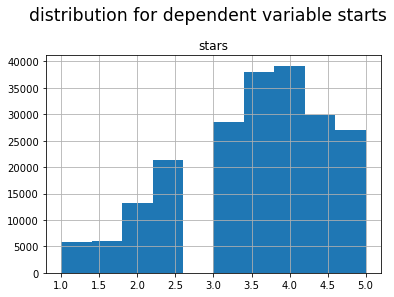

In [9]:
hist = dataframe[["stars"]].hist(bins=10)
plt.suptitle('distribution for dependent variable starts', x=0.5, y=1.05, ha='center', fontsize='xx-large')

explanation: It shows that there is a gap between review score 2.5 and 3.0, and the distribution of stars are left-skewed. In other words, most of the restaurant have a score above 3.0.

Text(0, 0.5, 'frequency')

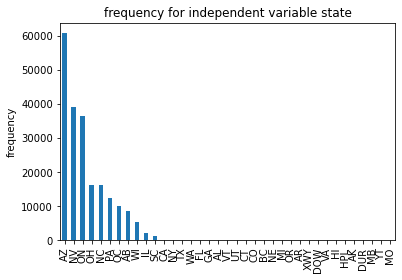

In [10]:
dataframe['state'].value_counts().plot(kind='bar',title="frequency for independent variable state")
plt.ylabel("frequency")

explanation: It shows that AZ, NV, ON, OH,NC and PA have the highest frequency as they appear on Yelp, which all of them have frequency above 10000, and on the other hand, exclude for these top states with the most frequency appear on Yelp, other states have a near zero frequency.

Text(0, 0.5, 'frequency')

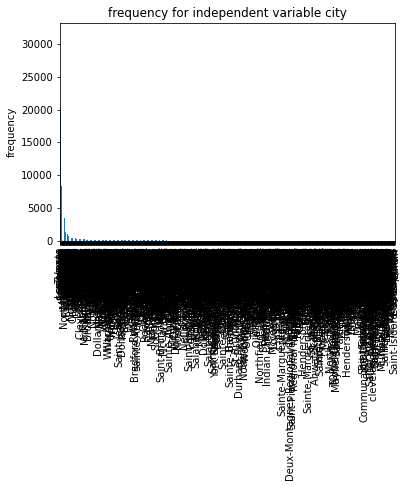

In [11]:
dataframe['city'].value_counts().plot(kind='bar',title="frequency for independent variable city")
plt.ylabel("frequency")

-Because the graph above is invisible for describing the distribution of covariate city, then I randomly selected 37 cities in two new dataframes (dataframe2 and dataframe3) to show their frequency distribution.

Text(0, 0.5, 'frequency')

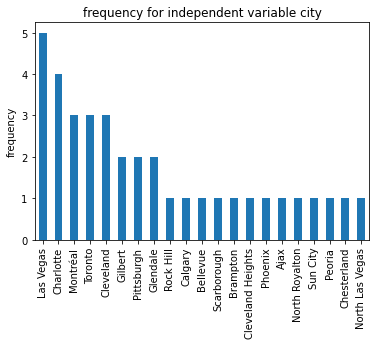

In [12]:
city2=dataframe[['city','stars']].sample(n=37)
dataframe2=pd.DataFrame(city2)
dataframe2['city'].value_counts().plot(kind='bar',title="frequency for independent variable city")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

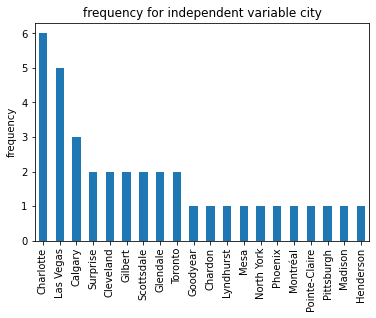

In [10]:
city3=dataframe[['city','stars']].sample(n=37)
dataframe3=pd.DataFrame(city3)
dataframe3['city'].value_counts().plot(kind='bar',title="frequency for independent variable city")
plt.ylabel("frequency")

explanation: I randomly selected 37 cities twice in two different dataframes to show their frequency respectively.It shows that exclude for cities like Charlotte, Las Vegas ,Calgary, Toronto have appeared the most on Yelp, exclude them majority of the cities have 1 frequency on average in these two random samples.

-To show the relationship between review stars and states, stars and cities respectively.

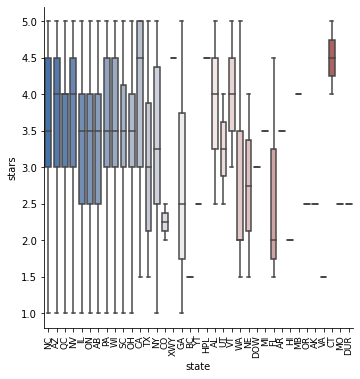

In [27]:
sns.catplot(x="state", y="stars", kind="box", data=dataframe, whis=[0, 100], width=0.7, palette="vlag").set_xticklabels(rotation=90,fontsize=9)

explanation: Previously we discoverd that AZ, NV, ON, OH,NC and PA have the highest frequency as they appear on Yelp, and interestingly, these states also seems to have the highest means and maximum value in their review stars. Compared with them, other states have a smaller than 1 spread and below 3.5 as their mean review score. 

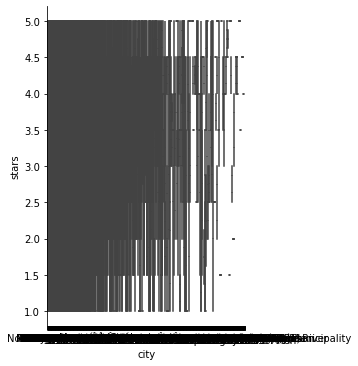

In [14]:
sns.catplot(x="city", y="stars", kind="box", data=dataframe, whis=[0, 100], width=.6, palette="vlag")

-Because the graph above is invisible about the relationship between city and stars when we include all the cities location, so I will continue to create datframe4 and dataframe5 which has a random selection of 70 sample to discover their relationship.

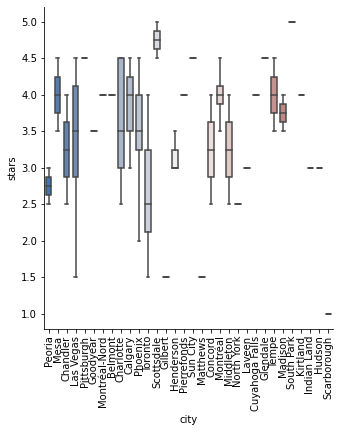

In [28]:
city4=dataframe[['city','stars']].sample(n=70)
dataframe4=pd.DataFrame(city4)
sns.catplot(x="city", y="stars", kind="box", data=dataframe4, whis=[0, 100], width=.6, palette="vlag").set_xticklabels(rotation=90,fontsize=10)

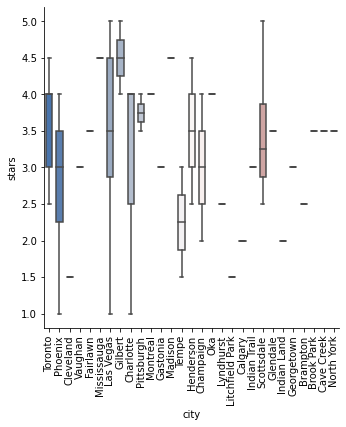

In [29]:
city5=dataframe[['city','stars']].sample(n=70)
dataframe5=pd.DataFrame(city5)
sns.catplot(x="city", y="stars", kind="box", data=dataframe5, whis=[0, 100], width=.6, palette="vlag").set_xticklabels(rotation=90,fontsize=10)

In [33]:
dataframe["city"].value_counts().head(10)

Las Vegas     31631
Toronto       20366
Phoenix       20171
Charlotte     10422
Scottsdale     9342
Calgary        8377
Pittsburgh     7630
Montréal       6979
Mesa           6577
Henderson      5272
Name: city, dtype: int64

In [32]:
dataframe["city"].value_counts().tail(10)

Richmonhill           1
Tremont               1
Toronto-North York    1
Sedona                1
Indianola             1
moon                  1
Phoneix               1
Mentor ohio           1
Warrenville           1
Westview              1
Name: city, dtype: int64

explanation: From the previous two graphs, we see that for the cities which have a mean review score above 3.5 and a wide spread, they usually appear twice in both graphs, for instance, Toronto, Phenix, Las vegas and Chorlotte. In addition, these cities also have the highest frequency. 

# Part 3. Conclusion

The distribution of review stars with cities and states shows there is a clear relationship between review stars and the location of the restaurant, and those restaurants with the highest review rates usually locate in the cities or states near the west coast and east coast. In addition, the most frequent in the cities or states that appear in Yelp also have high review scores. Moreover, the states with the most frequency usually have some cities in the top frequency list, but the top first states does not mean the top first city must locate in it, 

For more precise research purpose, the GDP of the cities, and the amount of restaurants in the cities should be considered in the further research. It is because for this moment, we only know the relationship between the reivew stars and location exists, but what factors make this relation happen are unkown. 

# Part 4. Reference

Md Tayeen, Abu Saleh & Mtibaa, Abderrahmen & Misra, Satyajayant. (2019). Location, location, location!: quantifying the true impact of location on business reviews using a Yelp dataset. 1081-1088. 10.1145/3341161.3345334. 